In [2]:
from pprint import pprint
import requests
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [3]:
params = {
    "per-page": 200,
    "mailto": "nick.young@auckland.ac.nz"
}
response = requests.get("https://api.openalex.org/works?filter=author.id:a5055846959", params=params).json()
pprint(response["meta"])
works = response["results"]
len(works)

{'count': 143,
 'db_response_time_ms': 43,
 'groups_count': None,
 'page': 1,
 'per_page': 200}


143

In [4]:
topics = []
for work in works:
  for topic in work["topics"]:
    topics.append(topic["display_name"])
len(topics)

398

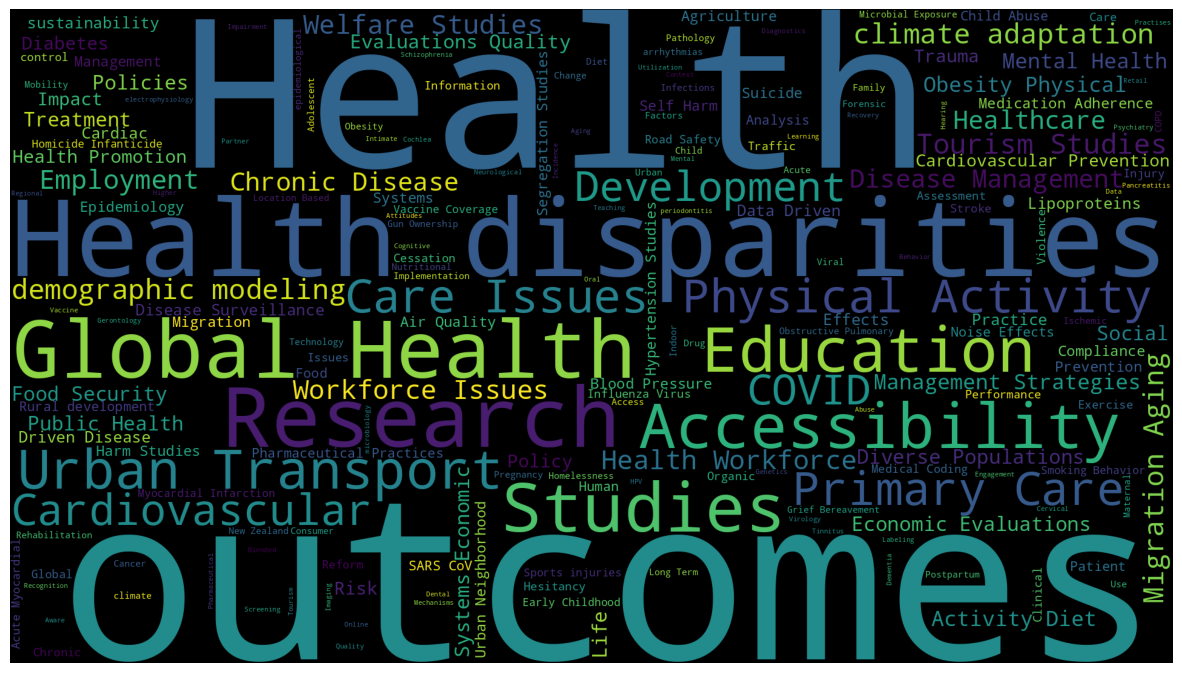

In [5]:
wordcloud = WordCloud(width=1920, height=1080).generate(" ".join(topics))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
topics = []
for work in works:
  for keyword in work["keywords"]:
    topics.append(keyword["display_name"])
len(topics)

197

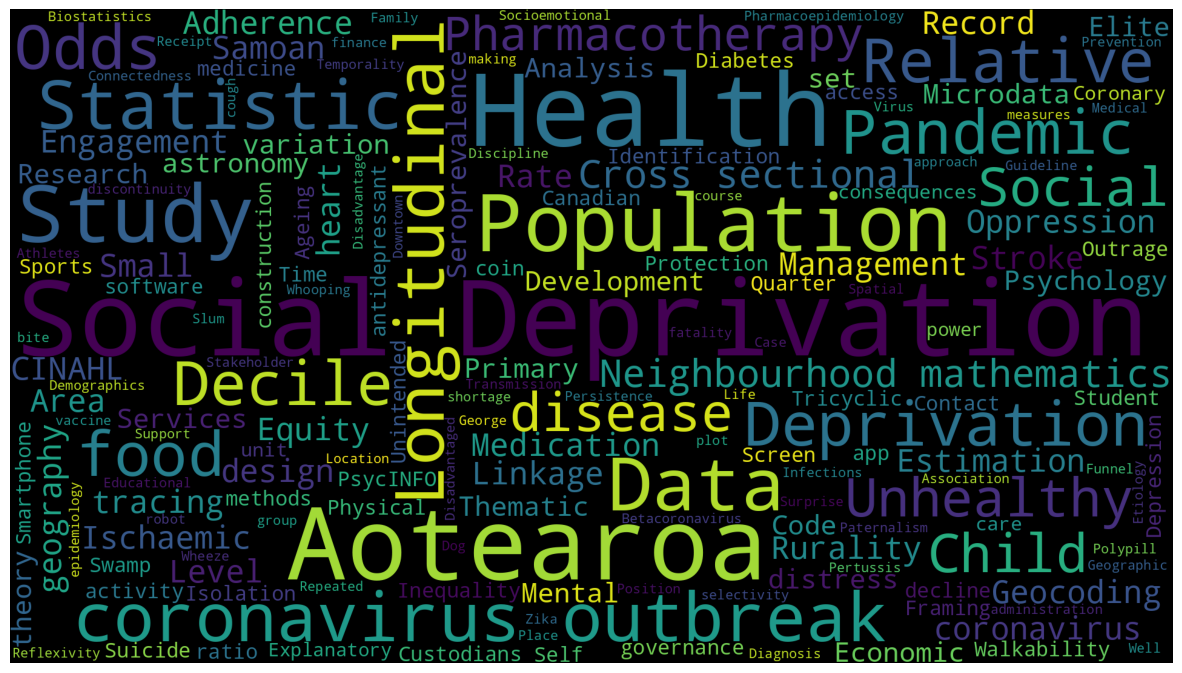

In [7]:
wordcloud = WordCloud(width=1920, height=1080).generate(" ".join(topics))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

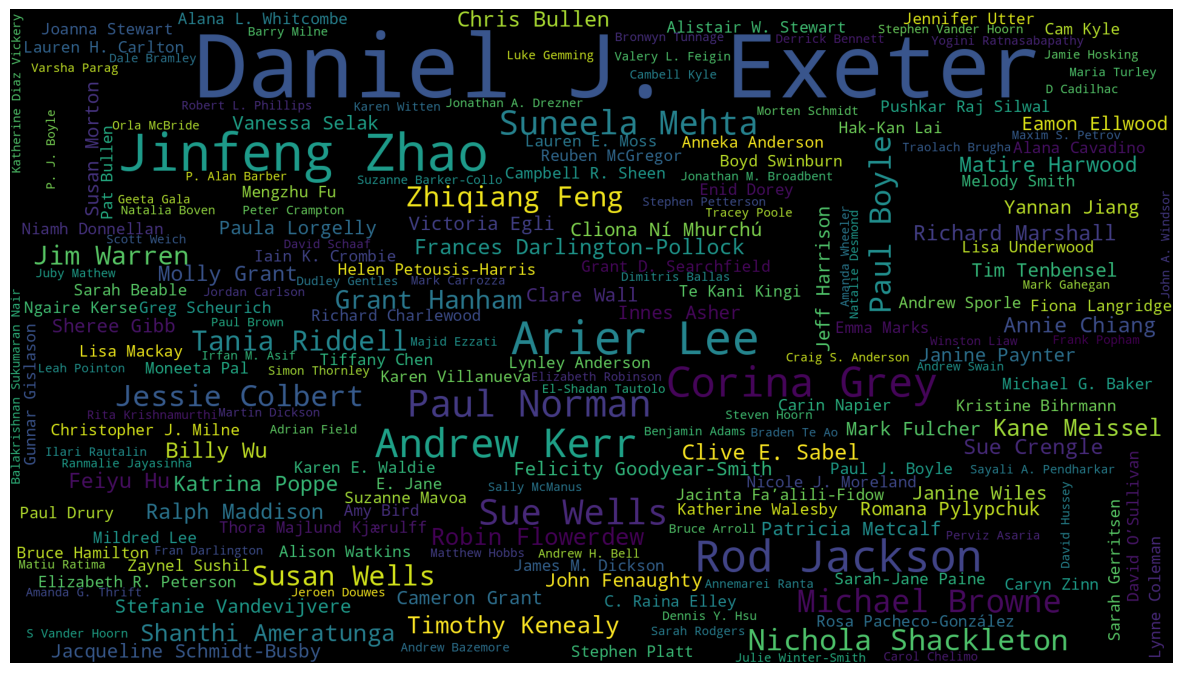

In [8]:
authors = {}
for work in works:
  for author in work["authorships"]:
    author_name = author["author"]["display_name"].replace("‐", "-")
    if author_name not in authors:
      authors[author_name] = 0
    authors[author_name] += 1

wordcloud = WordCloud(width=1920, height=1080).generate_from_frequencies(authors)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()